In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allison.linear_models.polinomic_regression import  PolinomicRegression
from allison.utils.functions.loss import mean_squared_error
from allison.utils.metrics import r2_score
from allison.utils.functions.data import train_test_split

In [3]:
n = 1000
x=np.linspace(2,10,n)
y=x**2 + x+ 5*np.sin(x) + 3*np.random.randn(n)

data = pd.DataFrame({'x':x, 'y':y})
data.head()

,x,y
0,2.000000,9.299182
1,2.008008,8.653773
2,2.016016,12.587461
3,2.024024,6.527070
4,2.032032,4.377656


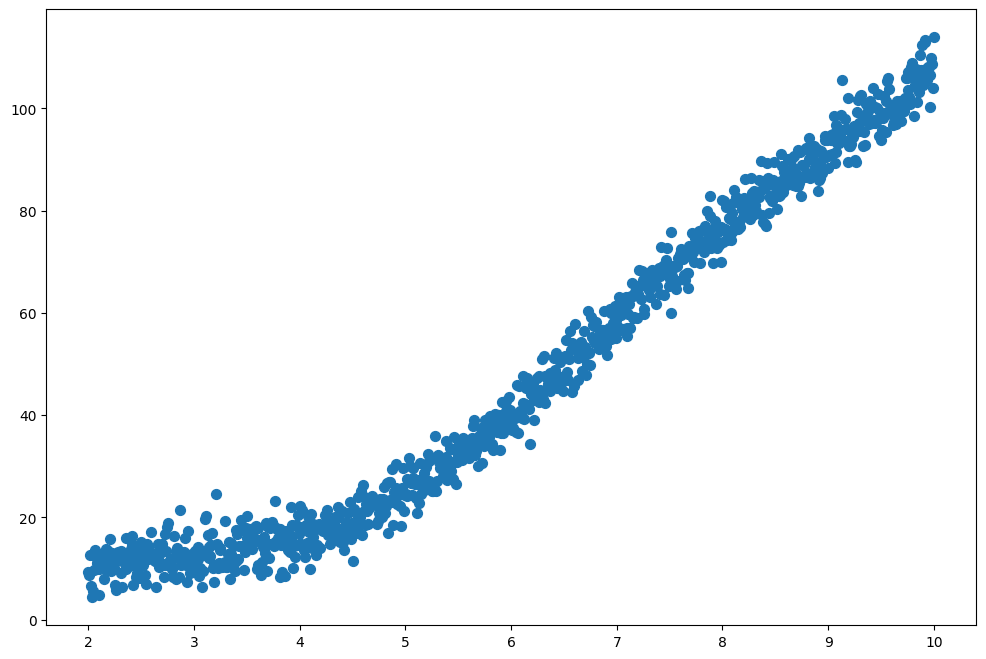

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(data['x'],data['y'],s=50)

In [5]:
X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [6]:
model=PolinomicRegression(loss_function=mean_squared_error,
                      metric=r2_score,
                      lr = 0.0005,
                      n_grade=2)

model.train(X_train, y_train,n_iters=20, history_train=True)

Iter:	2	==================================================>	 mean_squared_error: 115.733% 	 r2_score: 91.52% 

Iter:	4	==================================================>	 mean_squared_error: 50.173% 	 r2_score: 95.81% 

Iter:	6	==================================================>	 mean_squared_error: 28.101% 	 r2_score: 97.45% 

Iter:	8	==================================================>	 mean_squared_error: 20.842% 	 r2_score: 98.01% 

Iter:	10	==================================================>	 mean_squared_error: 18.559% 	 r2_score: 98.18% 

Iter:	12	==================================================>	 mean_squared_error: 17.907% 	 r2_score: 98.21% 

Iter:	14	==================================================>	 mean_squared_error: 17.762% 	 r2_score: 98.20% 

Iter:	16	==================================================>	 mean_squared_error: 17.761% 	 r2_score: 98.19% 

Iter:	18	==================================================>	 mean_squared_error: 17.789% 	 r2_score: 98.18% 

Iter

In [7]:
history = model.history_train
history

{'iter': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'loss': [np.float64(115.73263902590055),
  np.float64(50.173289873978355),
  np.float64(28.10083622618499),
  np.float64(20.841883763571172),
  np.float64(18.55933467225711),
  np.float64(17.90669637995877),
  np.float64(17.762426343218742),
  np.float64(17.76081227611121),
  np.float64(17.788802749591312),
  np.float64(17.815338610189876)],
 'precision': [np.float64(0.9152382371176973),
  np.float64(0.9580785855562606),
  np.float64(0.9745172397183157),
  np.float64(0.9801336039699149),
  np.float64(0.9817711270574923),
  np.float64(0.9820950505268972),
  np.float64(0.9820499984359202),
  np.float64(0.9819386893602461),
  np.float64(0.9818430816154436),
  np.float64(0.9817762047479005)],
 'params': [{'bias': array([0.98996023]),
   'weights': array([0.32235384, 0.80987445])},
  {'bias': array([0.99252726]), 'weights': array([0.33780176, 0.91665623])},
  {'bias': array([0.99403962]), 'weights': array([0.34690285, 0.97956635])},
  {'bias':

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.bias = history['params'][i]['bias']
    model.weights = history['params'][i]['weights']

    a = model.weights[0]
    b = model.bias[0]

    ax.scatter(X_train, y_train, s=50)
    if i > 0:
        ax.scatter(X_train, model.predict(X_train), lw=3, c='red',label=f'Predicted y = {a:.2f}x + {b:.2f}, loss = {history["loss"][i-1]:.2f}, r2 = {history["precision"][i-1]:.2f}%')
    else:
        ax.scatter(X_train, model.predict(X_train), lw=3, c='red', label=f'Predicted y = {a:.2f}x + {b:.2f}')
    ax.legend()



# Create the animation
ani = FuncAnimation(fig, update, frames=len(history['params']), repeat=False,interval=1000)

plt.close(fig)

# Display the animation
HTML(ani.to_jshtml())

In [9]:
model.evaluate(X_test, y_test)

np.float64(0.9765259782511734)

Text(0.5, 1.0, 'Linear Regression on Test Data(Accuracy:0.98%)')

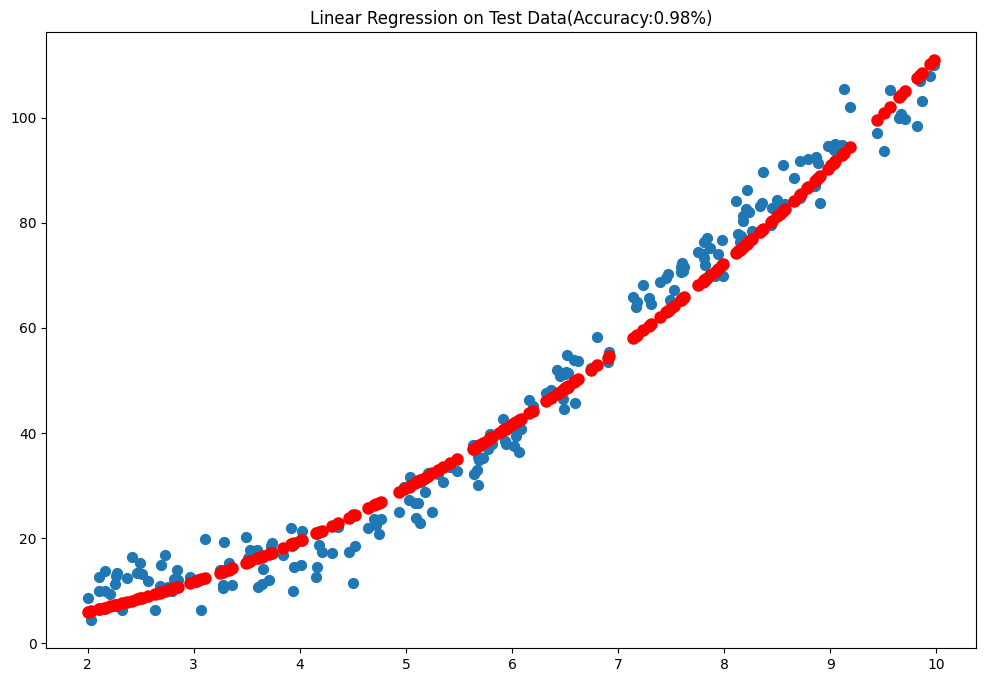

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(X_test,y_test,s=50)
plt.scatter(X_test,model.predict(X_test), lw=3, c='red')
plt.title(f'Linear Regression on Test Data(Accuracy:{model.evaluate(X_test, y_test):.2f}%)')